# Исследование тарифов телеком компании

Объект анализа - данные о 500 абонентах компании "Мегалайн" за 2018 год. Информация распределена на 5 таблиц: 

 - users (информация о пользователях)
 - calls (информация о звонках)
 - messages (информация о сообщениях)
 - internet (информация об интернет-сессиях)
 - tariffs (информация о тарифах)
 
Цель исследования - проанализировать поведение клиентов и предоставить коммерческому департаменту вывод о том, какой тариф приносит компании большую прибыль.

План работы:

    1 - Загрузка и обзор данных 
    2 - Предобработка данных
    3 - Исследовательский анализ
    4 - Проверка гипотез
    5 - Вывод

### Загрузка и обзор данных

In [ ]:
import pandas as pd
import numpy as np
#import statistics
from scipy import stats as st
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import inspect

In [ ]:
raw_calls = pd.read_csv("/datasets/calls.csv")
raw_internet = pd.read_csv("/datasets/internet.csv")
raw_messages = pd.read_csv("/datasets/messages.csv")
raw_tariffs = pd.read_csv("/datasets/tariffs.csv")
raw_users = pd.read_csv("/datasets/users.csv")

Проведем первичный обзор каждой таблицы

In [ ]:
def table_info(table_name):
    print()
    print('Первые 5 строк:')
    display(table_name.head())
    print()
    print('Информация о содержащихся данных:')
    print()
    display(table_name.info())
    print('Обзор числовых данных:')
    display(table_name.describe())
    print('Число дубликатов:')
    display(table_name.duplicated().sum())

In [ ]:
print('Обзор таблицы users')
table_info(raw_users)

Обзор таблицы users

Первые 5 строк:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Обзор числовых данных:


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Число дубликатов:


0

В таблице "users" пропущенные значения есть только в столбце "churn_date", т.е. почти все клиенты (кроме 38) продолжали пользоваться выбранным тарифом компании на момент выгрузки. Данные в числовых полях выглядят адекватно. Полных дубликатов нет.

In [ ]:
print('Обзор таблицы calls')
table_info(raw_calls)

Обзор таблицы calls

Первые 5 строк:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Обзор числовых данных:


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Число дубликатов:


0

В таблице "calls" нет пропущенных значений и полных дубликатов. Нулевые значения длительности разговоров скорее всего соответствуют пропущенным звонкам. В числовых данных аномалий не обнаружено.

In [ ]:
print('Обзор таблицы internet')
table_info(raw_internet)

Обзор таблицы internet

Первые 5 строк:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Обзор числовых данных:


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Число дубликатов:


0

В таблице "internet" нет пропущенных значений и полных дубликатов. Столбец "Unnamed: 0" скорее всего дублирует индексы. В числовых данных аномалий не обнаружено.

In [ ]:
print('Обзор таблицы messages')
table_info(raw_messages)

Обзор таблицы messages

Первые 5 строк:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Обзор числовых данных:


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Число дубликатов:


0

В таблице "internet" нет пропущенных значений и полных дубликатов. 

In [ ]:
print('Обзор таблицы tariffs')
raw_tariffs.head()

Обзор таблицы tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод:

Таблицы содержат информацию о действиях 500 клиентов компании из разных регионов страны в 2018 году. Возраст клиентов от 18 до 75 лет. 
В представленных данных почти нет пропущеннных значений, дубликатов или аномальных значений.
В некоторых столбцах нужно изменить тип данных.


### Предобработка данных

In [ ]:
# Рассмотрим столбец "churn_date" с пропущенными значениями 

print('Пропущено',(100. * raw_users["churn_date"].isna().sum()/raw_users.shape[0]).round(1).astype(str) + '%', 'значений')

Пропущено 92.4% значений


Удалять NaN нельзя, мы потеряем почти все данные. Заменим пропущенные значения на последний день года '2018-12-31'


In [ ]:
df_users = raw_users.copy(deep = True)
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

Создадим функции для автоматизации замены форматов данных в таблицах и для подсчета сэкономленной памяти.

In [ ]:
# Функция подсчета памяти, используемой для хнанения данных

def mem_usage(data):
    usage_b = data.memory_usage(deep=True).sum()
    usage_mb = usage_b / 1024 ** 2 
    return usage_mb.round(3)

In [ ]:
# Функция замены формата данных и оптимизации числовых подформатов

def dtype_optim(data):
        
    dt_columns, obj_columns = ([],[])
    data_dt = data.drop(axis = 1, columns = data.columns)
    converted_dt = data.drop(axis = 1, columns = data.columns) 
    
# Преобразуем столбцы типа 'object' в числовой формат или формат datetime
    for column in data.columns:
        if data[column].dtype == 'object':
            try:
                data[column] = pd.to_numeric(data[column])
            except:
                data_dt = pd.concat([data_dt, data[column]], axis=1)
                try:
                    data[column] = pd.to_datetime(data[column], format = '%Y-%m-%d')
                    dt_columns.append(column)
                    converted_dt = pd.concat([converted_dt, data[column]], axis=1)
                except:
                    obj_columns.append(column)
                    pass
        pass
    
    data_dt = data_dt[converted_dt.columns]   
    
    data_int = data.select_dtypes(include=['int'])
    converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')

    data_float = data.select_dtypes(include=['float'])
    converted_float = data_float.apply(pd.to_numeric,downcast='float')
    
    data.loc[:, data_int.columns] = converted_int
    data.loc[:, data_float.columns] = converted_float
    
    tot_mem_before = (mem_usage(data_int) + mem_usage(data_float) + mem_usage(data_dt)).round(3)
    tot_mem_after = (mem_usage(converted_int) + mem_usage(converted_float) + mem_usage(converted_dt)).round(3)
    reduced_int = (100*(1-mem_usage(converted_int)/ mem_usage(data_int))).round(3)
    reduced_float = (100*(1-mem_usage(converted_float)/ mem_usage(data_float))).round(3)
    reduced_total = (100*(1-tot_mem_after/tot_mem_before)).round(3)
    reduced_dt = (100*(1-mem_usage(converted_dt)/ mem_usage(data_dt))).round(3)

# Строим итоговую таблицу экономленной памяти
    mem_optimized = pd.DataFrame({'dtype' : ['int', 'float', 'datetime', 'total'], 
                                 'before, MB' : [mem_usage(data_int), mem_usage(data_float), mem_usage(data_dt), tot_mem_before], 
                                 'after, MB' : [mem_usage(converted_int), mem_usage(converted_float), mem_usage(converted_dt), tot_mem_after],
                                 'reduced, %' : [reduced_int, reduced_float, reduced_dt, reduced_total]})
    display(mem_optimized)
    display(data.info())

In [ ]:
dtype_optim(df_users)

,dtype,"before, MB","after, MB","reduced, %"
0,int,0.008,0.002,75.000
1,float,0.000,0.000,NaN
2,datetime,0.064,0.008,87.500
3,total,0.072,0.010,86.111


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null uint16
age           500 non-null uint8
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 25.0+ KB


None

В результате замены форматов и подформатов в таблице "users" удалось привести к нужному виду перевенные даты и сэкономить около 86% памяти.


В следующей таблице "calls" удалим звонки с нулевой длительностью, т.к. они не тарифицируются.
Идентификатор звонка "id" лучше привести к числовому формату. Для этого уберем номер user_id из значения "id" звонка, потому что это - дублирование информации из соседнего столбца.

In [ ]:
df_calls = raw_calls.query('duration != .0').reset_index(drop = True)
df_calls['id'] = df_calls['id'].str.slice(start=5)

In [ ]:
dtype_optim(df_calls)

,dtype,"before, MB","after, MB","reduced, %"
0,int,2.487,0.622,74.990
1,float,1.244,0.622,50.000
2,datetime,10.415,1.244,88.056
3,total,14.146,2.488,82.412


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null uint16
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float32
user_id      162994 non-null uint16
dtypes: datetime64[ns](1), float32(1), uint16(2)
memory usage: 2.5 MB


None

В результате преобразования типов данных в таблице "calls" удалось сократить использование памяти на 82%


Рассмотрим таблицу "internet"

Для дальнейшего анализа нужно очистить таблицу от лишней информации:

- удалить лишний столбец-дубликат индекса "Unnamed: 0" 
- убрать значения user_id из идентификаторов интернет сессий "id"
- удалить строки с нулевым значением "mb_used", т.к. они не тарифицируются

После этого нужно применить функцию оптимизации форматов данных

In [ ]:
df_internet = raw_internet.drop(axis = 1, columns = "Unnamed: 0")
df_internet['id'] = df_internet['id'].str.slice(start=5)
df_internet = df_internet.query('mb_used != 0').reset_index(drop = True)

In [ ]:
dtype_optim(df_internet)

,dtype,"before, MB","after, MB","reduced, %"
0,int,1.981,0.495,75.013
1,float,0.990,0.495,50.000
2,datetime,8.294,0.990,88.064
3,total,11.265,1.980,82.423


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 4 columns):
id              129798 non-null uint16
mb_used         129798 non-null float32
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null uint16
dtypes: datetime64[ns](1), float32(1), uint16(2)
memory usage: 2.0 MB


None

В результате преобразования типов данных в таблице "internet" удалось сократить использование памяти на 82%


Рассмотрим таблицу "messages". Очистим значения "id" от идентификатора абонента user_id и заменим форматы данных.


In [ ]:
df_messages = raw_messages
df_messages['id'] = df_messages['id'].str.slice(start=5)
dtype_optim(df_messages)

,dtype,"before, MB","after, MB","reduced, %"
0,int,1.878,0.469,75.027
1,float,0.000,0.000,NaN
2,datetime,7.862,0.939,88.056
3,total,9.740,1.408,85.544


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null uint16
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null uint16
dtypes: datetime64[ns](1), uint16(2)
memory usage: 1.4 MB


None

В результате преобразования типов данных в таблице "messages" удалось сократить использование памяти на 85%

Таблица "tariffs" очень маленькая и не содержит особенных типов данных, поэтому оптимизировать ее не имеет смысла. 

In [ ]:
df_tariffs = raw_tariffs

<div class="alert alert-block alert-info">
Округлим число минут
</div>

In [ ]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

# Объем интернет-трафика округлим при пересчете в гигабайты

#### Вычисление дополнительных значений

Рассчитаем параметры отдельных пользователей по месяцам, которые понадобятся в дальшейшем исследовании:

- число звонков и израсходованных минут разговора
- количество отправленных сообщений
- объем израсходованного интернет-трафика
- выручка с каждого пользователя 

In [ ]:
# Число звонков и израсходованных минут разговора

df_calls['month'] = df_calls['call_date'].dt.month
df_calls_agg = df_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count', 'sum'])
df_calls_agg.columns = ['calls_amount', 'time_spent']
df_calls_agg = df_calls_agg.reset_index(level='month')
display(df_calls_agg.tail(10))
print('Количество пользователей, совершавших звонки:',len(df_calls_agg.index.unique()))
print('Количество учтенных месяцев по всем пользователям:',df_calls_agg['month'].count())

,month,calls_amount,time_spent
user_id,,,
1497,11,48,371.0
1497,12,58,545.0
1498,7,20,175.0
1498,8,43,400.0
1498,9,53,471.0
1498,10,30,247.0
1499,9,8,70.0
1499,10,44,449.0
1499,11,62,612.0


Количество пользователей, совершавших звонки: 492
Количество учтенных месяцев по всем пользователям: 3168


In [ ]:
# Количество отправленных сообщений

df_messages['month'] = df_messages['message_date'].dt.month
df_messages_agg = df_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = ['count'])
df_messages_agg.columns = ['messages_amount']
df_messages_agg = df_messages_agg.reset_index(level='month')
display(df_messages_agg.tail(10))
print('Количество пользователей, отправлявших сообщения:',len(df_messages_agg.index.unique()))
print('Количество учтенных месяцев по всем пользователям:',df_messages_agg['month'].count())

,month,messages_amount
user_id,,
1497,11,14
1497,12,17
1498,7,20
1498,8,62
1498,9,44
1498,10,42
1499,9,11
1499,10,48
1499,11,59


Количество пользователей, отправлявших сообщения: 426
Количество учтенных месяцев по всем пользователям: 2717


In [ ]:
# Объем израсходованного интернет-трафика

df_internet['month'] = df_internet['session_date'].dt.month
df_internet_agg = df_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = ['sum'])
df_internet_agg.columns = ['mb_spent']
df_internet_agg['mb_spent'] = df_internet_agg['mb_spent'].round()
df_internet_agg = df_internet_agg.reset_index(level='month')
display(df_internet_agg.tail(10))
print('Количество пользователей, пользовавшихся интернетом:',len(df_internet_agg.index.unique()))
print('Количество учтенных месяцев по всем пользователям:',df_internet_agg['month'].count())

,month,mb_spent
user_id,,
1497,11,14156.0
1497,12,19919.0
1498,7,7476.0
1498,8,24235.0
1498,9,22134.0
1498,10,20579.0
1499,9,1846.0
1499,10,17789.0
1499,11,17963.0


Количество пользователей, пользовавшихся интернетом: 497
Количество учтенных месяцев по всем пользователям: 3201


In [ ]:
# Объединяя данные по звонкам, сообщениям и интернет-трафику с параметром how='outer', мы получаем все строки 
# для каждой пары user_id - month если клиент использовал хотя бы один тип связи в этот месяц. 

total_agg = df_calls_agg.merge(df_messages_agg[['month', 'messages_amount' ]], on = ['user_id', 'month'], how='outer')
total_agg = total_agg.merge(df_internet_agg[['mb_spent', 'month']], on = ['user_id', 'month'], how = 'outer')

print('Число клиентов, пользовавшихся хотя бы раз услугами связи :',len(total_agg.index.unique()))

Число клиентов, пользовавшихся хотя бы раз услугами связи : 498


In [ ]:
# Теперь нужно дополнить сводную таблицу данными о пользователях из таблицы users так, чтобы в нее вошли даже те 
# два клиента, которые были неактивны всё время. Для этого объединяем таблицы "справа"

total_agg = total_agg.merge(df_users[['user_id', 'tariff', 'city']], on = ['user_id'], how = 'right' )

In [ ]:
# Добавим информацию о тарифе каждого пользователя для расчета выручки.

total_agg = total_agg.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how = 'left')
total_agg = total_agg.drop(['calls_amount', 'tariff_name'], axis = 1)
total_agg = total_agg.set_index(['user_id', 'tariff', 'month']).sort_index(ascending = True)
total_agg = total_agg.fillna(0)

In [ ]:
# Расчитаем насколько клиенты превысили тарифные лимиты и сколько заплатили в итоге за все улуги

total_agg['minutes_over'] = (total_agg['time_spent'] - total_agg['minutes_included']).where((total_agg['time_spent'] - total_agg['minutes_included']) > 0, 0)
total_agg['messages_over'] = (total_agg['messages_amount'] - total_agg['messages_included']).where(total_agg['messages_amount'] - total_agg['messages_included'] > 0, 0)
total_agg['mb_over'] = (total_agg['mb_spent'] - total_agg['mb_per_month_included']).where((total_agg['mb_spent'] - total_agg['mb_per_month_included']) > 0, 0)
total_agg['gb_over'] = (total_agg['mb_over']/1024).apply(np.ceil)
total_agg['total'] = (total_agg['minutes_over'] * total_agg['rub_per_minute'] + 
                     total_agg['messages_over'] * total_agg['rub_per_message'] + 
                     total_agg['gb_over'] * total_agg['rub_per_gb']) + total_agg['rub_monthly_fee']

total_agg.head(14).T

user_id                     1000                                              \
tariff                     ultra                                               
month                       5.0        6.0        7.0        8.0        9.0    
time_spent                   159        172        340        408        466   
messages_amount               22         60         75         81         57   
mb_spent                    2253      23234      14004      14056      14569   
city                   Краснодар  Краснодар  Краснодар  Краснодар  Краснодар   
messages_included           1000       1000       1000       1000       1000   
mb_per_month_included      30720      30720      30720      30720      30720   
minutes_included            3000       3000       3000       3000       3000   
rub_monthly_fee             1950       1950       1950       1950       1950   
rub_per_gb                   150        150        150        150        150   
rub_per_message                1          1          1          1          1   
rub_per_minute                 1          1          1          1          1   
minutes_over                   0          0          0          0          0   
messages_over                  0          0          0          0          0   
mb_over                        0          0          0          0          0   
gb_over                        0          0          0          0          0   
total                       1950       1950       1950       1950       1950   

user_id                                                   1001          \
tariff                                                   smart           
month                       10.0       11.0       12.0    11.0    12.0   
time_spent                   350        338        333     430     414   
messages_amount               73         58         70       0       0   
mb_spent                   14702      14756       9818   18429   14037   
city                   Краснодар  Краснодар  Краснодар  Москва  Москва   
messages_included           1000       1000       1000      50      50   
mb_per_month_included      30720      30720      30720   15360   15360   
minutes_included            3000       3000       3000     500     500   
rub_monthly_fee             1950       1950       1950     550     550   
rub_per_gb                   150        150        150     200     200   
rub_per_message                1          1          1       3       3   
rub_per_minute                 1          1          1       3       3   
minutes_over                   0          0          0       0       0   
messages_over                  0          0          0       0       0   
mb_over                        0          0          0    3069       0   
gb_over                        0          0          0       3       0   
total                       1950       1950       1950    1150     550   

user_id                       1002                                         
tariff                       smart                                         
month                         6.0          7.0          8.0          9.0   
time_spent                     117          214          289          206  
messages_amount                  4           11           13            4  
mb_spent                     10857        17580        20319        16691  
city                   Стерлитамак  Стерлитамак  Стерлитамак  Стерлитамак  
messages_included               50           50           50           50  
mb_per_month_included        15360        15360        15360        15360  
minutes_included               500          500          500          500  
rub_monthly_fee                550          550          550          550  
rub_per_gb                     200          200          200          200  
rub_per_message                  3            3            3            3  
rub_per_minute                   3            3            3            3  
minutes_

#### Вывод

В результате предобработки данных удалось очистить таблицы от лишних столбцов и строк с нулевыми значениями. Также получилось привести к нужному типу данные с датой и с идентификаторами "id".
В итоге оптимизации подформатов объем используемой памяти снизился примерно на 85%.

Составлены сводные таблицы и расчитана месячная выручка с каждого клиента компании.

### Исследовательский анализ


In [ ]:
# Оставим в сводной таблице только переменные, описывающие поведение клиентов.

total_stat = total_agg.drop(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis = 1)

In [ ]:
# Напишем функцию для автоматизации анализа

def analyze_param(data, label, bins = 600):
    
    mean = np.round(np.mean(data), 2)
    median = np.round(np.median(data), 2)
    variance = np.round(np.var(data), 2)
    standart_deviation = np.round(np.std(data), 2)
    min_value = np.round(data.min(), 2)
    max_value = np.round(data.max(), 2)
    Q0_05 = np.round(data.quantile(0.05), 2)
    Q1 = np.round(data.quantile(0.25), 2)
    Q3 = np.round(data.quantile(0.75), 2)
    Q0_95 = np.round(data.quantile(0.95), 2)
    iqr = np.round(Q3 - Q1, 2) # Interquartile range
    
    fig, axs = plt.subplots(2, 1, figsize = (10,10))

    axs[0].set(xlabel = label)
    axs[0].boxplot(data,
                   notch=True, 
                   sym="o", 
                   vert=False,
                   widths = 0.1, 
                   patch_artist = True)
    axs[0].tick_params(axis = 'both', 
                       which = 'major', 
                       direction = 'inout', 
                       pad = 10)
                       
    axs[1].set(xlabel = label)                  
    axs[1].hist(data, bins)

    plt.suptitle(label, y = 0.94)
    fig.subplots_adjust(hspace=0.3)
    plt.axvline(x=data.mean(),
                linewidth=2, 
                color='g', 
                linestyle='--',
                label = 'Среднее')
    plt.axvline(x=data.median(),
                linewidth=2, 
                color='red', 
                linestyle='--',
                label = 'Медиана')
    plt.axvline(x=data.quantile(.05),
                linewidth=2, 
                color='y', 
                linestyle='--',
                label = '5й квантиль')
    plt.axvline(x=data.quantile(.95),
                linewidth=2, 
                color='y', 
                linestyle='--',
                label = '95й квантиль')
    leg = axs[1].legend();
    plt.show()
    
    print('Min: {:.2f}'.format(min_value))
    print('Mean: {:.2f}'.format(mean))
    print('Max: {:.2f}'.format(max_value))
    print('Variance: {:.2f}'.format(variance))
    print('Standart deviation: {:.2f}'.format(standart_deviation))
    print('5st percentile: {:.2f}'.format(Q0_05)) 
    print('25th percentile: {:.2f}'.format(Q1))
    print('Median: {:.2f}'.format(median))
    print('75th percentile: {:.2f}'.format(Q3))
    print('95th percentile: {:.2f}'.format(Q0_95))
    print('Interquartile range (IQR): {:.2f}'.format(iqr))

#### Исследование тарифа Ultra

In [ ]:
# Рассмотрим статистику пользователей тарифа "Ultra"

stat_ultra = total_stat.query('tariff == "ultra"')

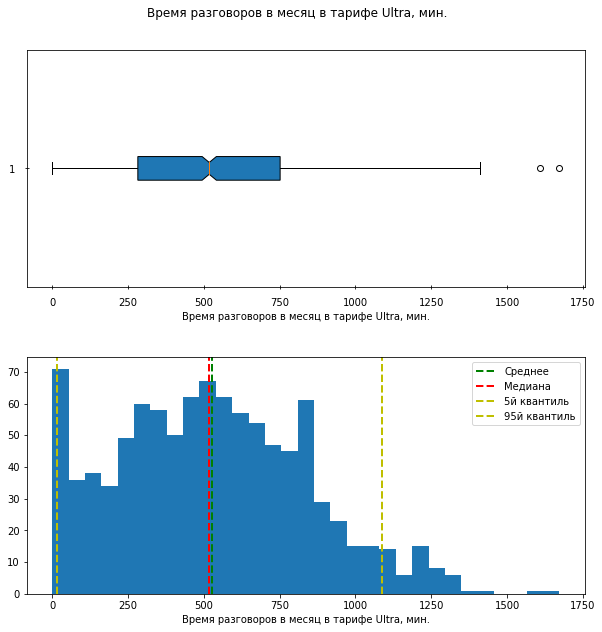

Min: 0.00
Mean: 526.09
Max: 1673.00
Variance: 100950.01
Standart deviation: 317.73
5st percentile: 16.00
25th percentile: 282.50
Median: 518.00
75th percentile: 751.75
95th percentile: 1088.50
Interquartile range (IQR): 469.25


In [ ]:
analyze_param(stat_ultra['time_spent'], 
              label = 'Время разговоров в меcяц в тарифе Ultra, мин.', 
              bins = int(np.sqrt(len(stat_ultra['time_spent']))))

Общее время разговоров за месяц пользователей тарифа Ultra распределены преимущественно в диапазоне 16 - 1088.5 мин. со средним значением 526 мин. и медианным 518 мин.. Ни один клиент не превысил лимит в 3000 минут разговора в месяц. Распределение почти симметрично. Стандартное отклонение равно 300 мин.

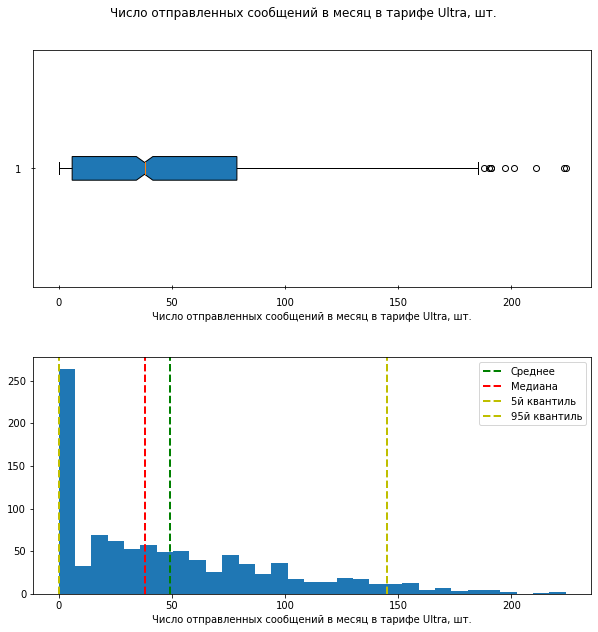

Min: 0.00
Mean: 49.31
Max: 224.00
Variance: 2283.10
Standart deviation: 47.78
5st percentile: 0.00
25th percentile: 6.00
Median: 38.00
75th percentile: 78.75
95th percentile: 145.00
Interquartile range (IQR): 72.75


In [ ]:
analyze_param(stat_ultra['messages_amount'], 
              label = 'Число отправленных сообщений в меcяц в тарифе Ultra, шт.', 
              bins = int(np.sqrt(len(stat_ultra['messages_amount']))))

Общее число сообщений, отправленных за месяц пользователями тарифа Ultra распределены преимущественно в диапазоне 0 - 145 шт. со средним значением 49.31 шт.. и медианным 38 шт..Многие клиенты не используют сообщения. Ни один клиент не превысил лимит в 1000 сообщений в месяц. Распределение сдвинуто вправо. Стандартное отклонение равно 47.78 шт.

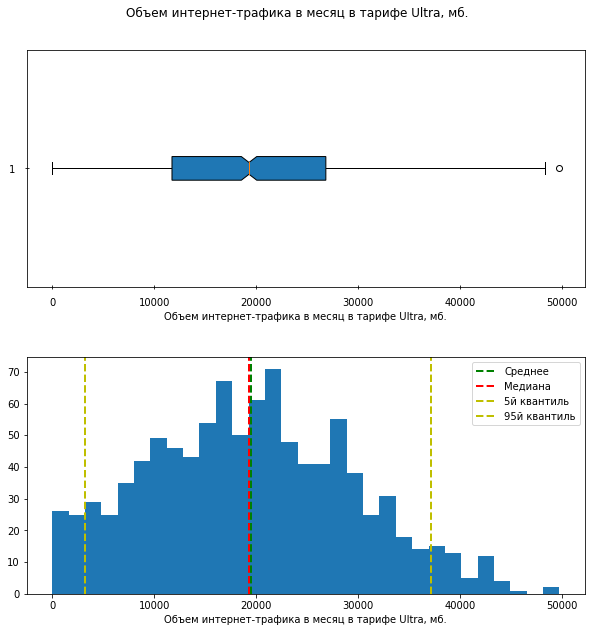

Min: 0.00
Mean: 19449.06
Max: 49746.00
Variance: 101928608.00
Standart deviation: 10095.97
5st percentile: 3188.50
25th percentile: 11748.25
Median: 19304.00
75th percentile: 26836.00
95th percentile: 37102.00
Interquartile range (IQR): 15087.75


In [ ]:
analyze_param(stat_ultra['mb_spent'], 
              label = 'Объем интернет-трафика в меcяц в тарифе Ultra, мб.', 
              bins = int(np.sqrt(len(stat_ultra['mb_spent']))))

Объем интернет-трафика, использованный за месяц пользователями тарифа Ultra распределен преимущественно в диапазоне 3188 - 37102 мб. со средним значением 19449 мб. и медианным 19304 мб.. Некоторые клиенты превысили лимит в 30Гб (30720 мб) в месяц. Распределение почти симметрично. Стандартное отклонение равно 10096 мб.

#### Исследование тарифа Smart

In [ ]:
# Рассмотрим статистику пользователей тарифа "Smart"

stat_smart = total_stat.query('tariff == "smart"')

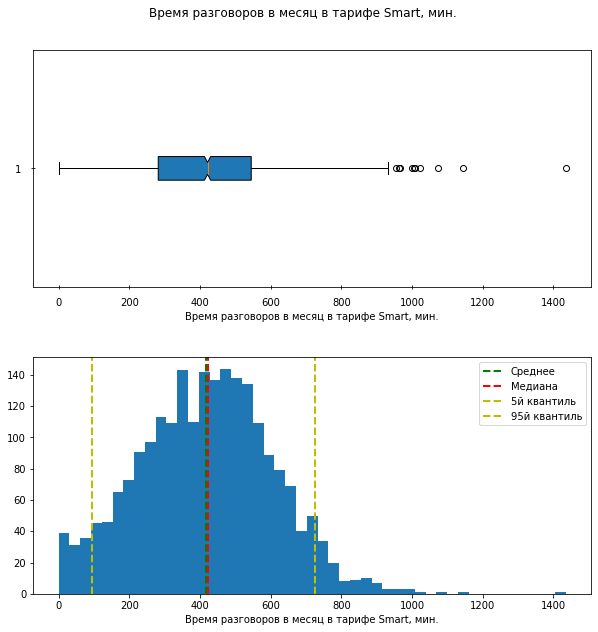

Min: 0.00
Mean: 417.75
Max: 1435.00
Variance: 36265.12
Standart deviation: 190.43
5st percentile: 95.00
25th percentile: 282.00
Median: 421.50
75th percentile: 545.00
95th percentile: 726.55
Interquartile range (IQR): 263.00


In [ ]:
analyze_param(stat_smart['time_spent'], 
              label = 'Время разговоров в меcяц в тарифе Smart, мин.', 
              bins = int(np.sqrt(len(stat_smart['time_spent']))))

Общее время разговоров за месяц пользователей тарифа Smart распределены преимущественно в диапазоне 95 - 726.5 мин. со средним значением 417.75 мин. и медианным 421.5 мин.. Многие клиенты превысили лимит в 500 минут разговора в месяц. Распределение почти симметрично, не считая некоторые выбросы с 1000 до 1435 мин. Стандартное отклонение равно 190 мин.

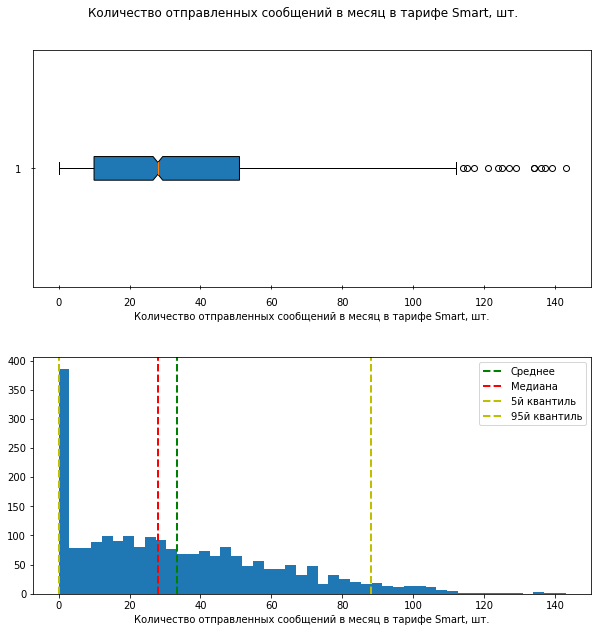

Min: 0.00
Mean: 33.37
Max: 143.00
Variance: 796.60
Standart deviation: 28.22
5st percentile: 0.00
25th percentile: 10.00
Median: 28.00
75th percentile: 51.00
95th percentile: 88.00
Interquartile range (IQR): 41.00


In [ ]:
analyze_param(stat_smart['messages_amount'], 
              label = 'Количество отправленных сообщений в меcяц в тарифе Smart, шт.', 
              bins = int(np.sqrt(len(stat_smart['messages_amount']))))

Общее число сообщений, отправленных за месяц пользователями тарифа Smart распределены преимущественно в диапазоне 0 - 88 шт. со средним значением 33.37 шт.. и медианным 28 шт.. Некоторые клиенты совсем не используют сообщения, некоторые, наоборот, превысили лимит в 50 сообщений в месяц. Распределение сдвинуто вправо с выбросами до 140 шт.. Стандартное отклонение равно  28.22 шт.

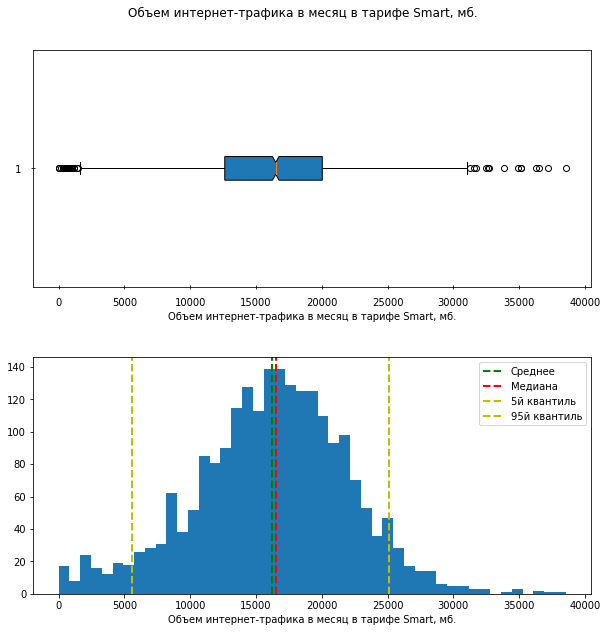

Min: 0.00
Mean: 16201.11
Max: 38552.00
Variance: 34549312.00
Standart deviation: 5877.87
5st percentile: 5576.90
25th percentile: 12630.25
Median: 16505.50
75th percentile: 20042.25
95th percentile: 25125.85
Interquartile range (IQR): 7412.00


In [ ]:
analyze_param(stat_smart['mb_spent'], 
              label = 'Объем интернет-трафика в меcяц в тарифе Smart, мб.', 
              bins = int(np.sqrt(len(stat_smart['mb_spent']))))

Объем интернет-трафика, использованный за месяц пользователями тарифа Smart распределен преимущественно в диапазоне 5577 - 25126 мб. со средним значением 16201 мб. и медианным 16505.5 мб.. Многие клиенты превысили лимит в 15Гб (15360 мб) в месяц. Распределение почти симметрично. Стандартное отклонение равно 5877.87 мб.


### Проверка гипотез

Для сравнительного анализа тарифов проверим от чего зависит выручка.

#### Сравнение выручки пользователей тарифов «Ультра» и «Смарт»

Построим распределение выручки клиентов обоих тарифов

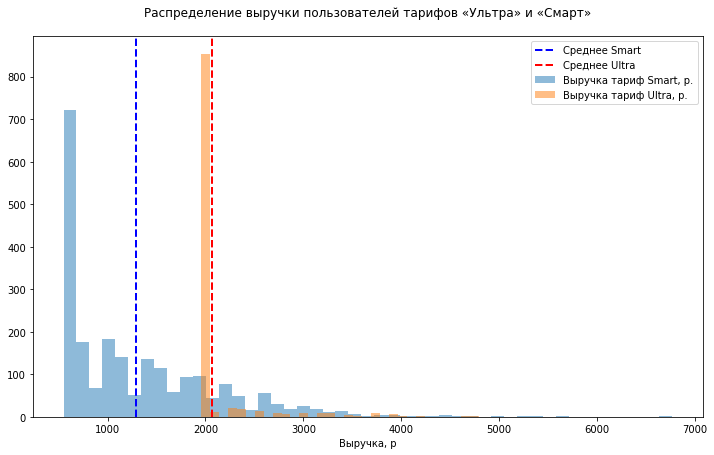

,Mean,Median,Variance,Standart deviation,Min value,Max value,5th quantile,25th quantile,75th quantile,95th quantile,IQR
Tariff,,,,,,,,,,,
Smart,1289.64,1021.0,669430.44,818.19,550.0,6770.0,550.0,550.0,1750.0,2888.05,1200.0
Ultra,2070.03,1950.0,141244.32,375.82,1950.0,4800.0,1950.0,1950.0,1950.0,3000.00,0.0


In [ ]:
mean_s = np.round(np.mean(stat_smart['total']), 2)
median_s = np.round(np.median(stat_smart['total']), 2)
variance_s = np.round(np.var(stat_smart['total']), 2)
standart_deviation_s = np.round(np.std(stat_smart['total']), 2)
min_value_s = np.round(stat_smart['total'].min(), 2)
max_value_s = np.round(stat_smart['total'].max(), 2)
Q0_05_s = np.round(stat_smart['total'].quantile(0.05), 2)
Q1_s = np.round(stat_smart['total'].quantile(0.25), 2)
Q3_s = np.round(stat_smart['total'].quantile(0.75), 2)
Q0_95_s = np.round(stat_smart['total'].quantile(0.95), 2)
iqr_s = np.round(Q3_s - Q1_s, 2)

mean_u = np.round(np.mean(stat_ultra['total']), 2)
median_u = np.round(np.median(stat_ultra['total']), 2)
variance_u = np.round(np.var(stat_ultra['total']), 2)
standart_deviation_u = np.round(np.std(stat_ultra['total']), 2)
min_value_u = np.round(stat_ultra['total'].min(), 2)
max_value_u = np.round(stat_ultra['total'].max(), 2)
Q0_05_u = np.round(stat_ultra['total'].quantile(0.05), 2)
Q1_u = np.round(stat_ultra['total'].quantile(0.25), 2)
Q3_u = np.round(stat_ultra['total'].quantile(0.75), 2)
Q0_95_u = np.round(stat_ultra['total'].quantile(0.95), 2)
iqr_u = np.round(Q3_u - Q1_u, 2)




fig, ax = plt.subplots(figsize = (12,7)) 
ax.set_title('Распределение выручки пользователей тарифов «Ультра» и «Смарт»', pad = 20)
ax.set(xlabel = "Выручка, р")
plt.hist(stat_smart['total'], bins = int(np.sqrt(len(stat_smart['total']))),  alpha = 0.5, label = 'Выручка тариф Smart, р.')
plt.hist(stat_ultra['total'], bins = int(np.sqrt(len(stat_ultra['total']))),  alpha = 0.5, label = 'Выручка тариф Ultra, р.')

plt.axvline(x=stat_smart['total'].mean(),
            linewidth=2, 
            color='b', 
            linestyle='--',
            label = 'Среднее Smart')
plt.axvline(x=stat_ultra['total'].mean(),
            linewidth=2, 
            color='r', 
            linestyle='--',
            label = 'Среднее Ultra')

leg = plt.legend()
plt.show()
total_table = pd.DataFrame({'Tariff' : ['Smart', 'Ultra'], 
                            'Mean' : [mean_s, mean_u], 
                            'Median' : [median_s, median_u],
                            'Variance' : [variance_s, variance_u], 
                            'Standart deviation' : [standart_deviation_s, standart_deviation_u],
                            'Min value' : [min_value_s, min_value_u], 
                            'Max value' : [max_value_s, max_value_u],
                            '5th quantile' : [Q0_05_s, Q0_05_u], 
                            '25th quantile' : [Q1_s, Q1_u],
                            '75th quantile' : [Q3_s, Q3_u], 
                            '95th quantile' : [Q0_95_s, Q0_95_u],
                            'IQR' : [iqr_s, iqr_u]})
display(total_table.set_index('Tariff'))

На гистограмме видно отличие распределений и средних значений выручки по двум тарифам.
Проверим гипотезу, что средняя выручка действительно отличается, т.е. что это статистически значимое различие средних значений.

H0 - Средние выручки тарифов Ultra и Smart равны
<br>
Н1 - Средние выручки тарифов Ultra и Smart не равны

Будем ипользовать двуторонний T-тест с уровнем статиcтической значимости alpha = 0.05. 
Значения стандартных отклонений сильно отличаются, поэтому значение параметра т-теста equal_var стоит поставить False  

In [ ]:
alpha = 0.05
results = st.ttest_ind(stat_smart['total'], stat_ultra['total'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Полученное значение p-value гораздо меньше порогового уровня alpha, что дает нам возможность отвергнуть нулевую гипотезу и установить что средние выручки двух тарифов не равны. Из гистограмм распределения выручки мы также можем однозначно сказать, что средняя выручка клиентов с тарифом Ultra больше, чем средняя выручка клиентов с тарифом Smart. Разница между средними значениями распределений равна 780.66р

Составим таблицу количества клиентов и выручки по тарифам

In [ ]:
smart_clients = df_users.query('tariff == "smart"')['user_id'].count()
ultra_clients = df_users.query('tariff == "ultra"')['user_id'].count()

smart_total = int(stat_smart['total'].sum().round())
ultra_total = int(stat_ultra['total'].sum().round())

tariffs_total = pd.DataFrame({'tariff' : ['smart', 'ultra', 'smart_share', 'ultra_share', 'total'], 
                             'clients' : [smart_clients, ultra_clients, round(smart_clients*100 / (smart_clients + ultra_clients)), round(ultra_clients*100 / (smart_clients + ultra_clients)), (smart_clients + ultra_clients)], 
                             'gain' : [smart_total, ultra_total, round(smart_total*100 / (smart_total + ultra_total)), round(ultra_total*100 / (smart_total + ultra_total)), (smart_total + ultra_total)]}).set_index('tariff')
display(tariffs_total.T)

tariff,smart,ultra,smart_share,ultra_share,total
clients,351,149,70,30,500
gain,2875901,2041050,58,42,4916951


При том, что тарифом Ультра пользуется только 30% клиентов, они приносят 42% выручки. Если скорректировать рекламный бюджет для увеличения доли клиентов с тарифом Ультра, то общая выручка компании значительно вырастет.

#### Сравнение выручки пользователей из Москвы и пользователей из других регионов

Построим распределение выручки клиентов из столицы и из остальных городов

In [ ]:
stat_moscow = total_stat.query('city == "Москва"')
stat_region = total_stat.query('city != "Москва"')

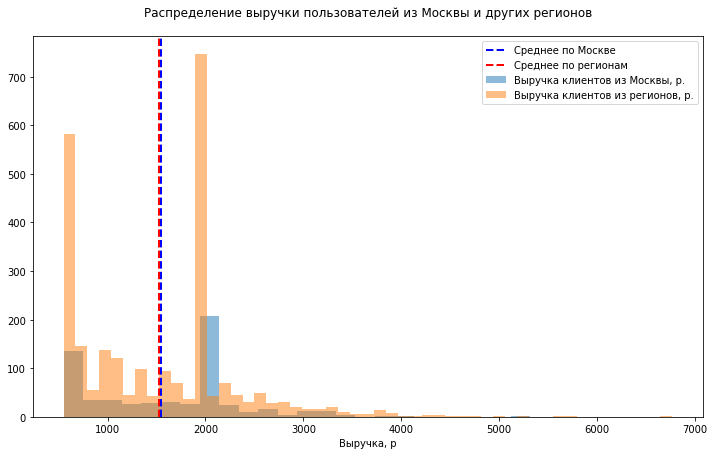

,Mean,Median,Variance,Standart deviation,Min value,Max value,5th quantile,25th quantile,75th quantile,95th quantile,IQR
City,,,,,,,,,,,
Moscow,1546.71,1750.0,564710.71,751.47,550.0,5321.0,550.0,780.5,1950.0,2883.0,1169.5
Regions,1524.73,1583.0,653818.49,808.59,550.0,6770.0,550.0,750.0,1950.0,2906.2,1200.0


In [ ]:
mean_s = np.round(np.mean(stat_moscow['total']), 2)
median_s = np.round(np.median(stat_moscow['total']), 2)
variance_s = np.round(np.var(stat_moscow['total']), 2)
standart_deviation_s = np.round(np.std(stat_moscow['total']), 2)
min_value_s = np.round(stat_moscow['total'].min(), 2)
max_value_s = np.round(stat_moscow['total'].max(), 2)
Q0_05_s = np.round(stat_moscow['total'].quantile(0.05), 2)
Q1_s = np.round(stat_moscow['total'].quantile(0.25), 2)
Q3_s = np.round(stat_moscow['total'].quantile(0.75), 2)
Q0_95_s = np.round(stat_moscow['total'].quantile(0.95), 2)
iqr_s = np.round(Q3_s - Q1_s, 2)

mean_u = np.round(np.mean(stat_region['total']), 2)
median_u = np.round(np.median(stat_region['total']), 2)
variance_u = np.round(np.var(stat_region['total']), 2)
standart_deviation_u = np.round(np.std(stat_region['total']), 2)
min_value_u = np.round(stat_region['total'].min(), 2)
max_value_u = np.round(stat_region['total'].max(), 2)
Q0_05_u = np.round(stat_region['total'].quantile(0.05), 2)
Q1_u = np.round(stat_region['total'].quantile(0.25), 2)
Q3_u = np.round(stat_region['total'].quantile(0.75), 2)
Q0_95_u = np.round(stat_region['total'].quantile(0.95), 2)
iqr_u = np.round(Q3_u - Q1_u, 2)




fig, ax = plt.subplots(figsize = (12,7)) 
ax.set_title('Распределение выручки пользователей из Москвы и других регионов', pad = 20)
ax.set(xlabel = "Выручка, р")
plt.hist(stat_moscow['total'], bins = int(np.sqrt(len(stat_moscow['total']))),  alpha = 0.5, label = 'Выручка клиентов из Москвы, р.')
plt.hist(stat_region['total'], bins = int(np.sqrt(len(stat_region['total']))),  alpha = 0.5, label = 'Выручка клиентов из регионов, р.')

plt.axvline(x=stat_moscow['total'].mean(),
            linewidth=2, 
            color='b', 
            linestyle='--',
            label = 'Среднее по Москве')
plt.axvline(x=stat_region['total'].mean(),
            linewidth=2, 
            color='r', 
            linestyle='--',
            label = 'Среднее по регионам')

leg = plt.legend()
plt.show()
total_table = pd.DataFrame({'City' : ['Moscow', 'Regions'], 
                            'Mean' : [mean_s, mean_u], 
                            'Median' : [median_s, median_u],
                            'Variance' : [variance_s, variance_u], 
                            'Standart deviation' : [standart_deviation_s, standart_deviation_u],
                            'Min value' : [min_value_s, min_value_u], 
                            'Max value' : [max_value_s, max_value_u],
                            '5th quantile' : [Q0_05_s, Q0_05_u], 
                            '25th quantile' : [Q1_s, Q1_u],
                            '75th quantile' : [Q3_s, Q3_u], 
                            '95th quantile' : [Q0_95_s, Q0_95_u],
                            'IQR' : [iqr_s, iqr_u]})
display(total_table.set_index('City'))

На гистограмме видна схожесть распределений и средних значений выручки по Москве и другим городам. Проверим гипотезу, что средняя выручка отличается, т.е. что есть статистически значимое различие средних значений.

H0 - Средние выручки клиентов из Москвы и из других городов равны
<br>
Н1 - Средние выручки клиентов из Москвы и из других городов не равны

Будем ипользовать двуторонний T-тест с уровнем статиcтической значимости alpha = 0.05.
Значения стандартных отклонений очень близки, поэтому значение параметра т-теста equal_var поставим True

In [ ]:
alpha = 0.05
results = st.ttest_ind(stat_moscow['total'], stat_region['total'], equal_var = True)

print('p-значение:', results.pvalue.round(2))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.54
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value означает, что вероятность получить случайно такое или большее различие между средними значениями распределений равно 54%, что больше порогового уровня alpha. Это не дает нам возможность отвергнуть нулевую гипотезу и значит, средние выручки в Москве и регионах равны. 


<div class="alert alert-block alert-info">
Проверим нормальность распределений выручки по тарифам
<br>
    
Используем комплексный Тест д'Агостино-Пирсона на асимметрию и эксцесс для проверки того, является ли распределение гауссовым.

Н0 - выборка взята из нормально распределенной совокупности
    <br>
H1 - выборка взята не из нормально распределенной совокупности
</div>

In [ ]:
for i in [stat_smart['total']]:  
    k2, p = st.normaltest(stat_smart['total'], axis=0, nan_policy='propagate')
    alpha = 1e-3
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Отвергаем нулевую гипотезу")
    else: 
        print("Не получилось отвергнуть нулевую гипотезу") 

p = 9.02036e-135
Отвергаем нулевую гипотезу


Как показал тест, распреление выручки не нормальное, но для проветения Т-теста на равенство средних значений это условие не обязательное при достаточном количестве выборок и отсутствии сильных выбросов.

<div class="alert alert-block alert-info">
Проверим равенство дисперсий выручки по тарифам и регионам
<br>
    
Используем Тест Левена на равенство диспеерсий в случае существенно не нормальных распределений.

Н0 - выборки имеют одинаковые дисперсии
    <br>
H1 - выборка имеют разные дисперсии
</div>

In [ ]:
stat, p = st.levene(stat_smart['total'], stat_ultra['total'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: samples have equal variances
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p = 2.35787e-122
Отвергаем нулевую гипотезу


In [ ]:
stat, p = st.levene(stat_moscow['total'], stat_region['total'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: samples have equal variances
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p = 0.0140153
Не получилось отвергнуть нулевую гипотезу


Как показал тест, распределения выручки по тарифам Смарт и Ультра имеют разные дисперссии. Параметр equal_var в Т-тесте стоит поставить False

Распределения выручки по Москве и другим городам имеют одинаковые дисперссии. Параметр equal_var в Т-тесте стоит поставить True

### Общий вывод

Удалось определить с дотаточной статистической достоверностью, что средняя выручка клиентов с тарифом «Ультра» больше, чем средняя выручка клиентов с тарифом «Смарт» в среднем на 780.66р. При этом гипотеза о том, что выручка зависит от места проживания клиента, не подтвердилась.

Проведен анализ поведения 500 клиентов из разных городов, пользующихся тарифами сотовой связи «Смарт» и «Ультра» в 2018 году. В ходе анализа построены гистограммы распределения показателей активности абонентов, расчитаны основные статистические характеристики. Характер распределений по двум тарифам схож, однако итоговая выручка сильно зависит от выбора тарифа. Многие клиенты с тарифом «Смарт» превышают установленные лимиты времени разговора, количества сообщений и интернет-трафика и оплачивают перерасход в соответствии с тарифом. В то время как клиенты с тарифом «Ультра» в большинстве своем укладываются в тарифные лимиты и не платят ничего сверх абонентской платы. Однако разница почти в 4 раза в абонентской плате между тарифами приводит к тому, что 30% клиентов компании с тарифом «Ультра», приносят 42% выручки. Если получится увеличить долю клиентов с тарифом «Ультра», то общая выручка компании значительно вырастет.

| |Смарт|Ультра|Доля смарта|Доля ультры|Сумма|
|:----|:----|:----|:----|:----|:----|
|Количество клиентов|351|149|70|30|500|
|Выручка|2802759|2041050|58|42|4843809|

В ходе первичного анализа и предобработки данных таблицы были очищены от лишних столбцов и строк с нулевыми значениями. Также получилось привести к нужному типу данные с датой и с идентификаторами "id". В итоге оптимизации подформатов объем используемой памяти снизился примерно на 85%. 